In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [6]:
from autometrics.metrics.llm_judge.LLMJudgeExampleRubric import LLMJudgeExampleRubric

In [7]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeExampleRubric(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized Example Rubric LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Answer the user query as a helpful chatbot assistant.",
        target_column=target_column,
        output_prompt_path='helpsteer_exrubric_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])

Average Metric: 641.3333333333335 / 1000  (64.1): 100%|██████████| 1000/1000 [00:05<00:00, 195.54it/s]


New best score: 64.13


Average Metric: 652.5333333333339 / 1000  (65.3): 100%|██████████| 1000/1000 [00:05<00:00, 174.82it/s]


New best score: 65.25


Average Metric: 638.1833333333336 / 1000  (63.8): 100%|██████████| 1000/1000 [00:05<00:00, 170.26it/s]


New best score: 63.82


Average Metric: 650.45 / 1000  (65.0): 100%|██████████| 1000/1000 [00:05<00:00, 186.19it/s]          


New best score: 65.05


Average Metric: 653.1333333333336 / 1000  (65.3): 100%|██████████| 1000/1000 [00:10<00:00, 95.69it/s]


New best score: 65.31


Average Metric: 664.5666666666676 / 1000  (66.5): 100%|██████████| 1000/1000 [00:05<00:00, 193.03it/s]


New best score: 66.46


Average Metric: 665.7166666666674 / 1000  (66.6): 100%|██████████| 1000/1000 [00:05<00:00, 180.37it/s]


New best score: 66.57


Average Metric: 683.0333333333344 / 1000  (68.3): 100%|██████████| 1000/1000 [00:04<00:00, 216.66it/s]


New best score: 68.3


Average Metric: 625.6595238095239 / 1000  (62.6): 100%|██████████| 1000/1000 [00:05<00:00, 188.74it/s]


New best score: 62.57


Average Metric: 673.0761904761906 / 1000  (67.3): 100%|██████████| 1000/1000 [00:05<00:00, 178.64it/s]


New best score: 67.31


Average Metric: 693.5333333333341 / 1000  (69.4): 100%|██████████| 1000/1000 [00:05<00:00, 188.91it/s]


New best score: 69.35


Grading rows: 100%|██████████| 1789/1789 [07:10<00:00,  4.16row/s]


In [8]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,correctness_llama70b (0.4632465628873455),coherence_llama70b (0.46341745071265134),helpfulness_llama70b (0.47141103523645905),complexity_llama70b (0.11383552018029178),verbosity_llama70b (0.166181731243458)
correctness,correctness_llama70b (0.44309753224191845),coherence_llama70b (0.4550068583164495),helpfulness_llama70b (0.45902056505111893),complexity_llama70b (0.10028545400831221),verbosity_llama70b (0.15133890135756908)
coherence,correctness_llama70b (0.3005676379157154),helpfulness_llama70b (0.3336583791626806),coherence_llama70b (0.32465108292204364),verbosity_llama70b (0.12818899233231934),complexity_llama70b (0.060815642761224)
complexity,verbosity_llama70b (0.3261165722764928),complexity_llama70b (0.29010370016882153),helpfulness_llama70b (0.19801881731204854),coherence_llama70b (0.19192350413300446),correctness_llama70b (0.17753163584780096)
verbosity,verbosity_llama70b (0.4559712917608025),complexity_llama70b (0.36718212849946685),helpfulness_llama70b (0.18743730391252064),correctness_llama70b (0.18543786685813848),coherence_llama70b (0.1846229653103619)


In [9]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:01<00:00,  2.88it/s]


In [10]:
train.get_metric_columns()

['helpfulness_Meta-Llama-3-70b-Instruct',
 'correctness_Meta-Llama-3-70b-Instruct',
 'coherence_Meta-Llama-3-70b-Instruct',
 'complexity_Meta-Llama-3-70b-Instruct',
 'verbosity_Meta-Llama-3-70b-Instruct']

In [11]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_coherence_llm (0.4827770843967556),correctness_llama70b (0.4632465628873455),coherence_llama70b (0.46341745071265134),helpfulness_llama70b (0.47141103523645905),Rg_correctness_llm (0.45667720738222123)
correctness,correctness_llama70b (0.44309753224191845),Rg_coherence_llm (0.4771440214357514),coherence_llama70b (0.4550068583164495),helpfulness_llama70b (0.45902056505111893),Rg_correctness_llm (0.43630678200621253)
coherence,Rg_coherence_llm (0.34701003904774175),correctness_llama70b (0.3005676379157154),helpfulness_llama70b (0.3336583791626806),coherence_llama70b (0.32465108292204364),Rg_correctness_llm (0.3108995613706572)
complexity,verbosity_llama70b (0.3261165722764928),Rg_verbosity_llm (0.38355777496356463),Rg_complexity_llm (0.3692915018998377),complexity_llama70b (0.29010370016882153),Rg_correctness_llm (0.27905634326681555)
verbosity,Rg_verbosity_llm (0.47910419239901025),verbosity_llama70b (0.4559712917608025),Rg_complexity_llm (0.458239638516815),complexity_llama70b (0.36718212849946685),Rg_correctness_llm (0.3172116401533944)


In [13]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Rg_coherence_llm (0.4827770843967556),helpfulness_llama70b (0.47141103523645905),coherence_llama70b (0.46341745071265134),correctness_llama70b (0.4632465628873455),Rg_correctness_llm (0.45667720738222123)
correctness,Rg_coherence_llm (0.4771440214357514),helpfulness_llama70b (0.45902056505111893),coherence_llama70b (0.4550068583164495),correctness_llama70b (0.44309753224191845),Rg_correctness_llm (0.43630678200621253)
coherence,Rg_coherence_llm (0.34701003904774175),helpfulness_llama70b (0.3336583791626806),coherence_llama70b (0.32465108292204364),Rg_correctness_llm (0.3108995613706572),correctness_llama70b (0.3005676379157154)
complexity,Rg_verbosity_llm (0.38355777496356463),Rg_complexity_llm (0.3692915018998377),verbosity_llama70b (0.3261165722764928),complexity_llama70b (0.29010370016882153),Rg_correctness_llm (0.27905634326681555)
verbosity,Rg_verbosity_llm (0.47910419239901025),Rg_complexity_llm (0.458239638516815),verbosity_llama70b (0.4559712917608025),complexity_llama70b (0.36718212849946685),Rg_correctness_llm (0.3172116401533944)


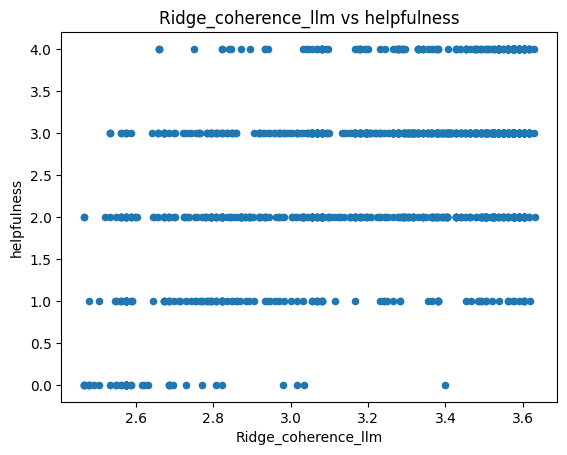

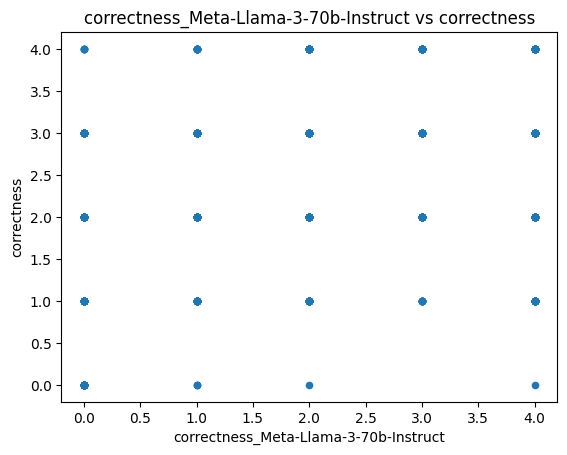

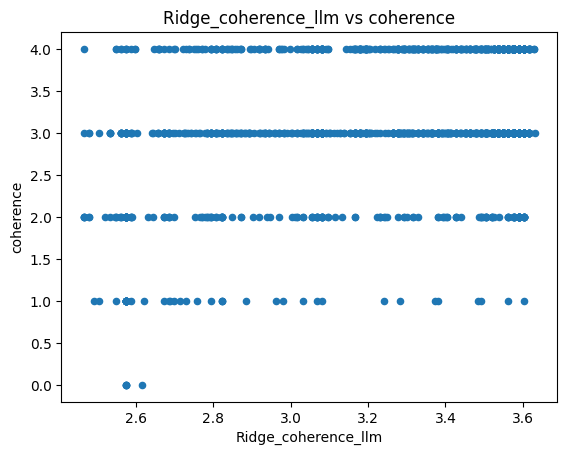

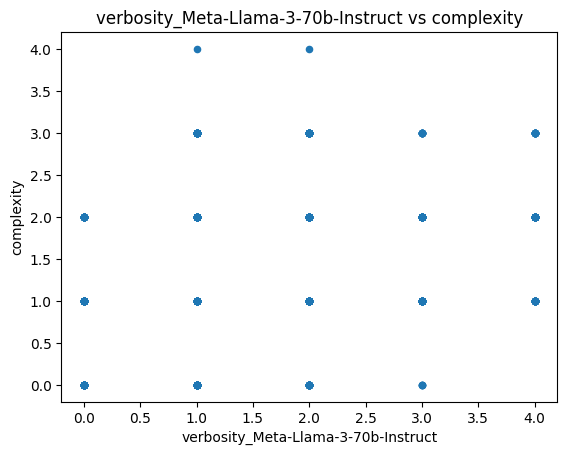

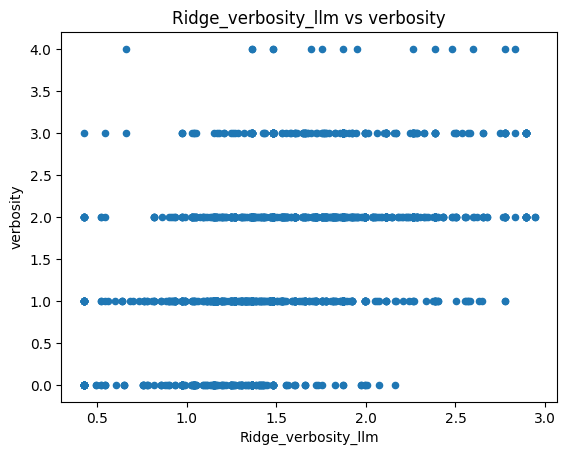

In [14]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
